# **Movie Genres Classification**
*Predicting the genre of movie from just 1000 characters of the script.*

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset
df = pd.read_csv('kaggle_movie_train.csv')

# **Exploring the dataset**

In [3]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [4]:
df.shape

(22579, 3)

In [5]:
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


In [6]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

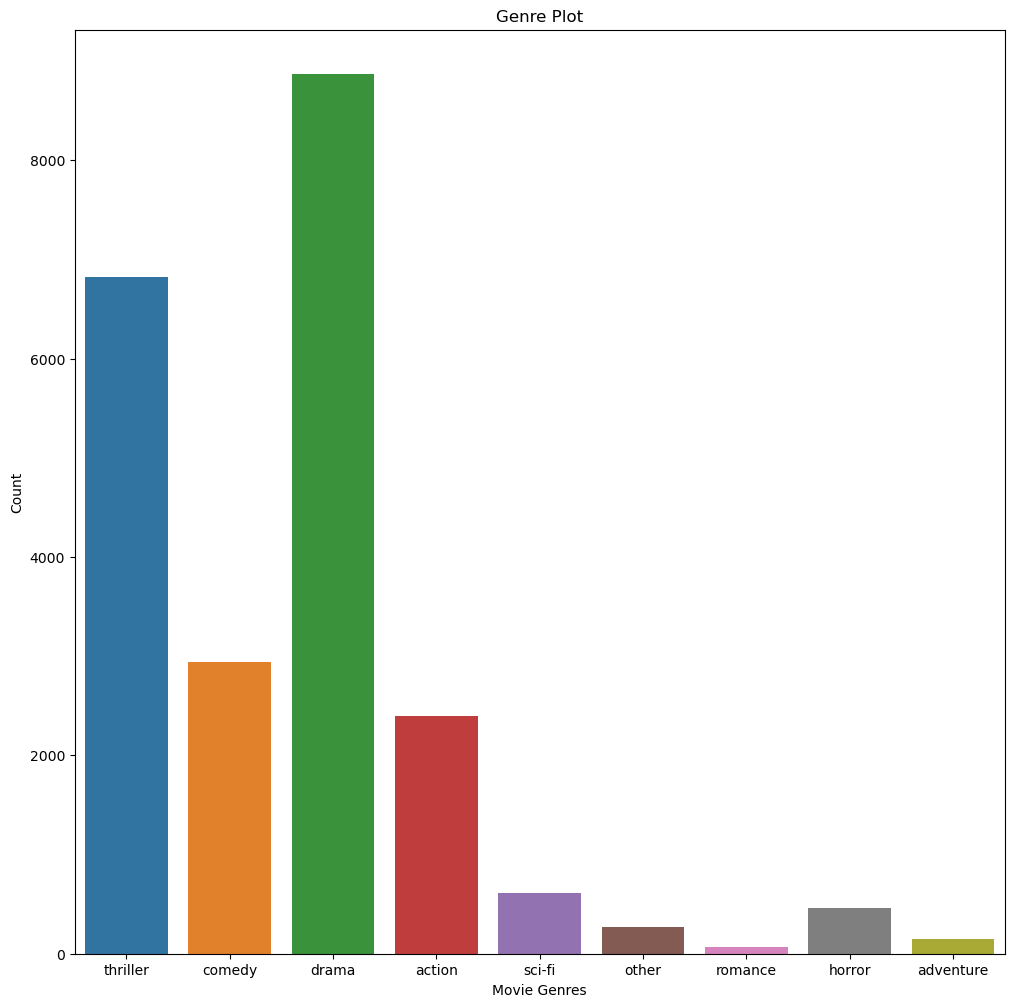

In [7]:
# Visualizing the count of 'genre' column from the dataset
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

# **Data Cleaning and Preprocessing**

In [8]:
# Finding unique genres
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [9]:
# Mapping the genres to values
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [10]:
# Finding any NaN values
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [11]:
# Removing the 'id' column
df.drop('id', axis=1, inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

In [12]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
df.shape

(22579, 2)

In [14]:
# Cleaning the text
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

  # Cleaning special character from the dialog/script
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

  # Converting the entire dialog/script into lower case
  dialog = dialog.lower()

  # Tokenizing the dialog/script by words
  words = dialog.split()

  # Removing the stop words
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in dialog_words]

  # Joining the stemmed words
  dialog = ' '.join(words)

  # Creating a corpus
  corpus.append(dialog)

In [15]:
corpus[0:10]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [16]:
df[df['genre']==4].index

Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,    16,
       ...
       22553, 22560, 22561, 22563, 22564, 22567, 22568, 22571, 22574, 22575],
      dtype='int64', length=8873)

In [17]:
len(corpus)

22579

In [18]:
drama_words = []
for i in list(df[df['genre']==4].index):
  drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
  action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
  comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 3):
  drama += drama_words[i]
  action += action_words[i]
  comedy += comedy_words[i]

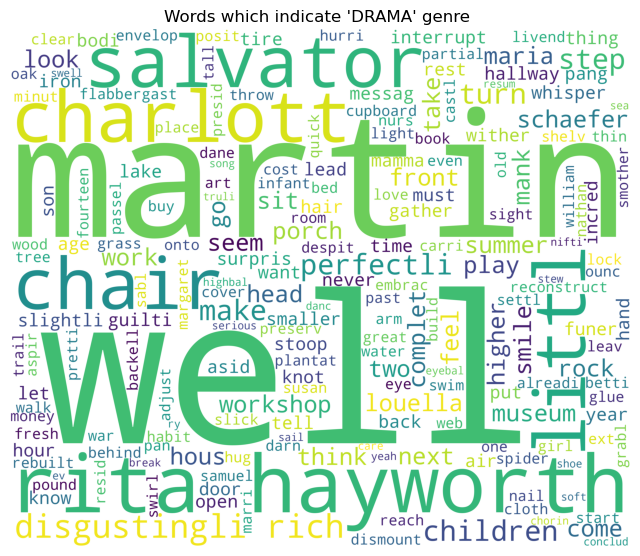

In [19]:
# Creating wordcloud for drama genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

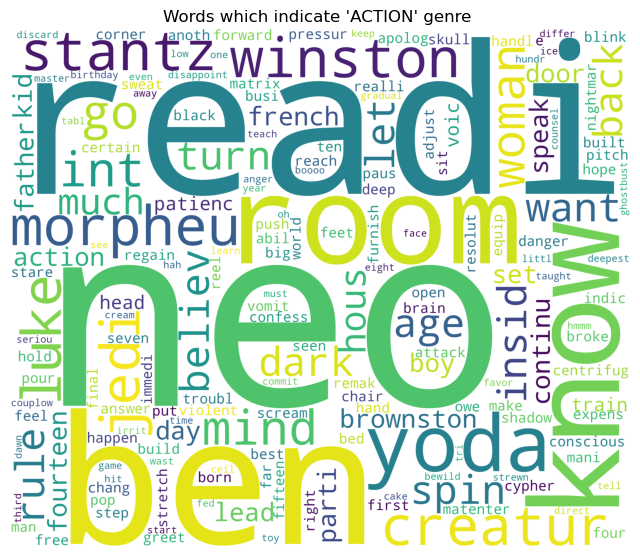

In [20]:
# Creating wordcloud for action genre
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()

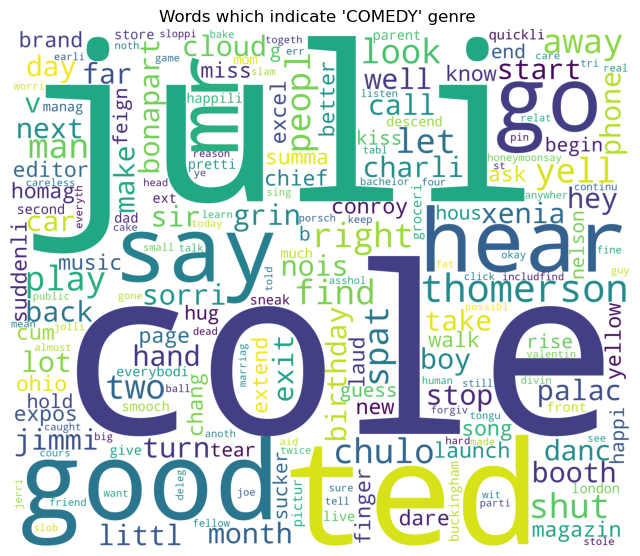

In [21]:
# Creating wordcloud for comedy genre
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

In [22]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [23]:
y = df['genre'].values

# **Model Building**

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


## *Multinomial Naive Bayes*

In [25]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [26]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [27]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.57%


In [28]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [29]:
nb_cm

array([[  62,    1,    0,    0,    1,    2,    0,    0,    0],
       [   0,  450,    0,    8,    6,    1,    0,    0,   11],
       [   0,    2,   41,    0,    1,    0,    0,    0,    1],
       [   0,    7,    0,  517,   18,    2,    0,    4,   11],
       [   3,   42,    1,   38, 1607,   21,    1,   11,  103],
       [   0,    1,    0,    1,    4,   73,    0,    0,    3],
       [   0,    1,    0,    0,    0,    0,   10,    0,    0],
       [   0,    2,    0,    2,    7,    1,    0,  112,    8],
       [   0,   14,    0,   21,   77,   11,    0,   22, 1173]],
      dtype=int64)

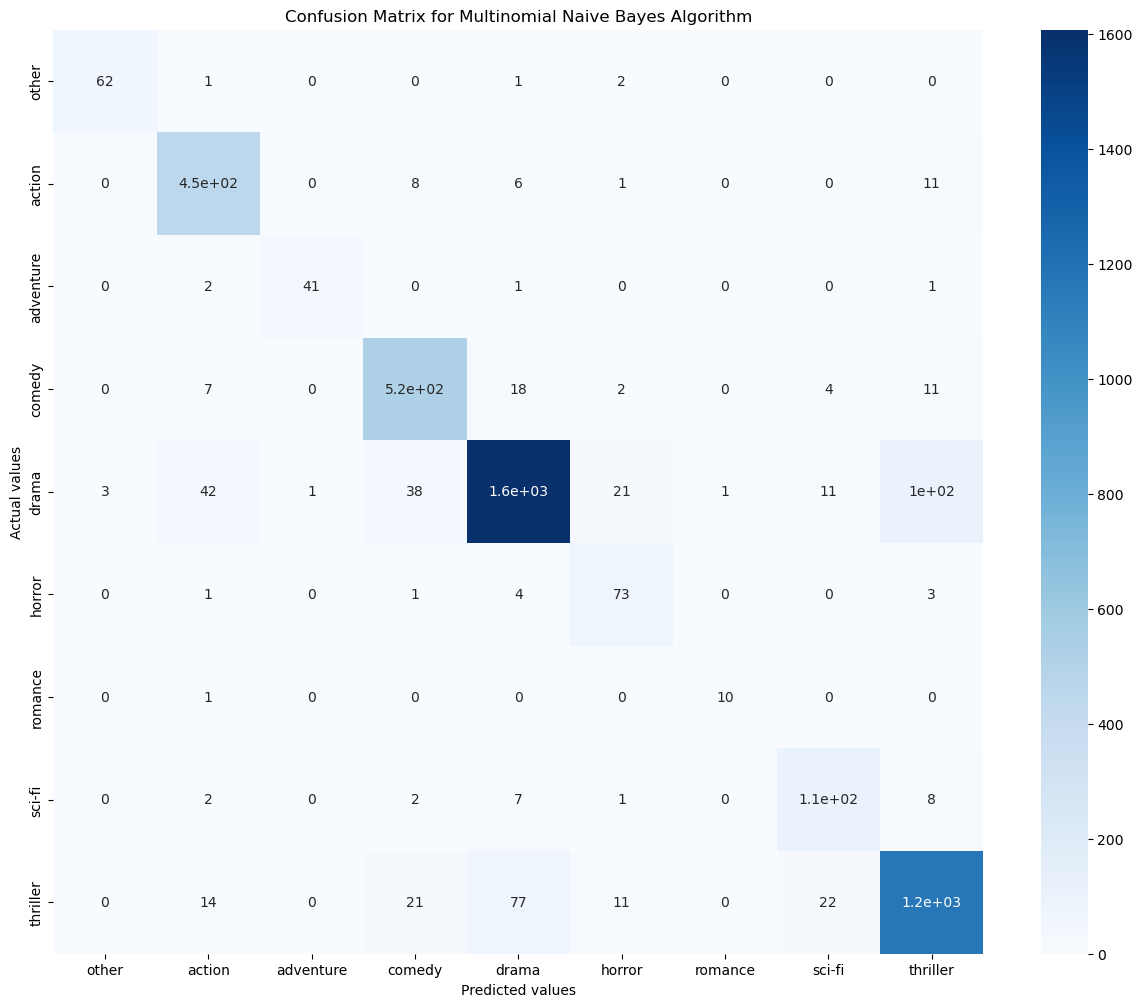

In [30]:
# Plotting the confusion matrix
plt.figure(figsize=(15,12))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [31]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 91.34%
Accuracy score for alpha=0.2 is: 91.08%
Accuracy score for alpha=0.3 is: 90.85%
Accuracy score for alpha=0.4 is: 90.59%
Accuracy score for alpha=0.5 is: 90.26%
Accuracy score for alpha=0.6 is: 90.12%
Accuracy score for alpha=0.7 is: 90.04%
Accuracy score for alpha=0.8 is: 89.95%
Accuracy score for alpha=0.9 is: 89.79%
Accuracy score for alpha=1.0 is: 89.57%
--------------------------------------------
The best accuracy is 91.34% with alpha value as 0.1


In [32]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

# **Predictions**

In [33]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [34]:
# For generating random integer
from random import randint

In [36]:
# Loading test dataset
test = pd.read_csv('kaggle_movie_test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [37]:
test.shape

(5589, 2)

In [38]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


In [39]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: ely innocent people. INSIDE HER BEDROOM Madison stares gravely into the screen. MADISON Grimes, you better not be the dominant. CUT TO OUTSIDE MADISON'S HOUSE Parker and Karin continue staring at each other in silence. He smiles. Then she smiles. She wiggles her nose. Then so does he. Madison comes out wearing fresh clothing, then kisses her daughter good night. As Madison goes to the squad car, Karin waves good bye to Parker. He does the same. Karin's babysitter then leads her back inside the house. INSIDE PARKER'S SQUAD CAR Madison gets in, immediately noticing the handcuffs dangling from the steering wheel. Parker has been free the entire time. PARKER Told you I wasn't going to go anywhere. MADISON How did you get your hand out? As she unlocks the handcuffs from the steering wheel, Parker wiggles his mechanical hand in front of her face. PARKER Sometimes, I like being part machine. Annoyed, Madison tosses him the car keys. He starts the engine and drives. PARKER CONT'D Why d

In [40]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: oss, shuts the radio off, turns, CAMERA PULLS BACK TO A WIDER SHOT OF MITCHELL'S ROOM which is not typical, not very expensive hotel room, but with some personal furniture such as table lamps, a shelf of books, a few indications that this has become the home of someone. Gore moves towards the bed, Killaine is going through the contents of a suitcase. He has underwear, shirts, socks, etc., spread out all around the bed cover. GORE She didn't seem the type to lam out even if she got the chance. That stuff was all gone through last night. Anything special you're looking for, Inspector? KILLAINE I'll know when I find it. GORE I guess I'm just ballast around here. Killaine doesn't answer. He straightens up with a very fancy thin gold cigarette case in his hand. He opens it. GORE You get those from rich women if you are the kind of guy Mitchell was. Killaine dumps the cigarettes out of the case and holds the inside against the light. His gaze becomes fixed. KILLAINE reading G.G. Mark

In [41]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: athered, sharp, treacherous. THE MATCH goes out, and the Watcher's face FADES TO BLACK, and so do we. FADE IN ON EXT. THE HILLS OF NICE MORNING A PRIVATE ESTATE IN THE HILLS A CARAVAN OF BLACK ARMOR PLATED CARS, all idling, ready to pull out, filled with muscular men in suits with bluges under their jackets, all of them waiting for THE TARGET. Except we've seem him before and he wasn't called the Target he was the Killer from the first scene of the film the gunman in the cathedral who made off with THE BRIEFCASE. Which the briefcase is still handcuffed to his side. Now the Target gets into his car, a BLACK MERCEDES, and as soon as he's in the caravan pulls out and The Target takes out his cell phone, punches in a number and starts to talk, and as he does we PULL BACK, INTO THE AIR, leaving the Caravan behind as we MOVE TOWARDS THE WATER and THE PROMENADE DES ANGLAIS, the long roadway that runs the length of the town adjacent to the beach. It's a special place, a huge road for c

In [42]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: r. BRILL, unfazed, pushes the Chevy faster. Beam or no beam, he's going through. BRILL Think we let out enough air? DEAN realizing Oh my God... BRILL and DEAN hit the deck as the Chevy's hood scrapes just under the beam. The windshield frame takes the full impact. The beam slices through steel and glass, decapitating the car. They emerge on the other side minus roof and windows as the Saturn SCREECH STOPS inches from the beam and debris. A MAN leaps out, shoulders his rifle and aims but the Chevy disappears around a building. EXT. HIGHWAY EARLY MORNING A foggy morning. The rural highway's deserted at this early hour. The Chevy rumbles by... INT. CHEVY CONTINUOUS DEAN and BRILL, windblown but alive, remove shards of glass. BRILL eyes the road behind him. Empty. BRILL We lost 'em. DEAN That wasn't so hard. BRILL Fuckin A. DEAN Let's not do the tire thing anymore, okay? BRILL Yeah, I can see where that'd He stops talking. He hears ROTOR THUMPS as a black HELICOPTER appears over a 

In [43]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: nd confidential. Thanks. INT. PLANE NIGHT Fletch is sitting in a semi deserted flight on his way back home. He is hunched over an airline meal, eating with his right hand and turning in his mini recorder with his left. FLETCH Question But as he pushed the button down, the tape pops out. He fumbles it back in, and then pushes another button. FLETCH Question... TAPE RECORDER Fletch's voice playing back Day three on the beach. Fat Sam still hasn't moved, and FLETCH stopping the machine What's wrong with my life? He starts it right this time. FLETCH Question Why does a man marry a millionaire's daughter in Beverly Hills if he is already married to a girl who lives in a crappy one bedroom apartment in Utah? Answer Three million dollars. Big Question What's with Stanwyk and Cummings? I don't know. Bigger Question Why does Stanwyk want me to kill him? He takes a spoonful of airline food, chewing meditatively. FLETCH Biggest Question Why do I eat this sh t? to passing stewardess Miss, 